In [182]:
# pandas and numpy for data manipulation
import pandas as pd
import numpy as np

# scipy for algorithms
import scipy
from scipy import stats

# pymc3 for Bayesian Inference, pymc built on t
from pymc3 import  *


import theano.tensor as tt
import scipy
from scipy import optimize

# matplotlib for plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from IPython.core.pylabtools import figsize
import matplotlib

import json
s = json.load(open('../style/bmh_matplotlibrc.json'))
matplotlib.rcParams.update(s)
matplotlib.rcParams['figure.figsize'] = (10, 3)
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['ytick.major.size'] = 20

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
# Number of samples for Markov Chain Monte Carlo
N_SAMPLES = 5000

### use a simple linear regression problem as an example

In [65]:
size = 200
true_intercept = 100
true_slope = 10

x = np.linspace(0, 1, size)
# y = a + b*x
true_regression_line = true_intercept + true_slope * x
# add noise
y = true_regression_line + np.random.normal(scale=.9, size=size)

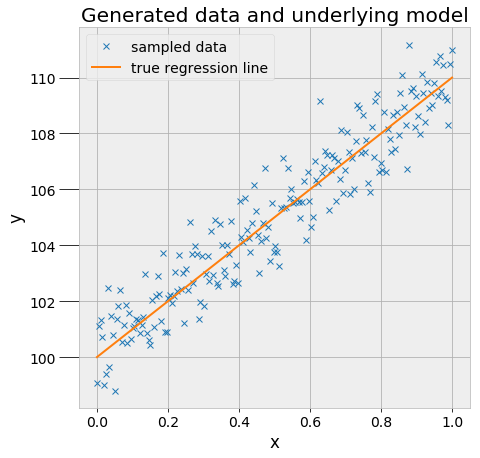

In [66]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, xlabel='x', ylabel='y', title='Generated data and underlying model')
ax.plot(x, y, 'x', label='sampled data')
ax.plot(x, true_regression_line, label='true regression line', lw=2.)
plt.legend(loc=0);
plt.show()

data = dict(x=x, y=y)

In [75]:
with Model() as model: # model specifications in PyMC3 are wrapped in a with-statement
    # Define priors
    sigma = HalfCauchy('sigma', beta=10, testval=1.)
    intercept = Normal('Intercept', 0, sd=2000)
    x_coeff = Normal('x', 0, sd=200)

    # Define likelihood
    likelihood = Normal('y', mu=intercept + x_coeff * x,
                        sd=sigma, observed=y)
#     print(f'likelihood is: {likelihood}')
    # Inference!
    trace = sample(3000, cores=2) # draw 3000 posterior samples using NUTS sampling

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [x, Intercept, sigma]
Sampling 2 chains: 100%|██████████| 7000/7000 [00:12<00:00, 567.05draws/s] 
The acceptance probability does not match the target. It is 0.9861499510139274, but should be close to 0.8. Try to increase the number of tuning steps.


<Figure size 504x504 with 0 Axes>

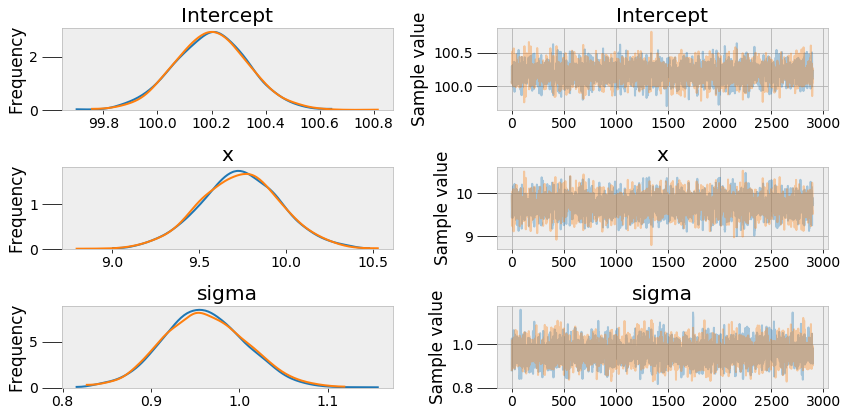

In [76]:

plt.figure(figsize=(7, 7))
traceplot(trace[100:])
plt.tight_layout();

model $y = \alpha*x + \beta$ assumimg a and b draw from normal distribution.

a real problem: does this agree with fisher exact test?  pfisher=0.11. how can i use baysian analysis to see if the mutation rates in hiv+ and - is signifcantly different. in other word, is p+ and p- is from the same distribution of p. 

|mutation|hiv+|hiv-|
|---|---|---|
|mut|21|20|
|wt|52|25|


a patient is mutated or not is a Bernoulli random variable, either mutated or wt. $p_+=21/73=0.29, p_-=20/45=0.44$, assume they are from the same normal distribution with mu=41/118=0.35.

In [ ]:
x = np.array([0.29, 0.44])

In [145]:
20/45
21/73

0.4444444444444444

0.2876712328767123

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...


starting sampling


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p]
Sampling 4 chains: 100%|██████████| 10000/10000 [00:03<00:00, 2966.55draws/s]


<Figure size 504x504 with 0 Axes>

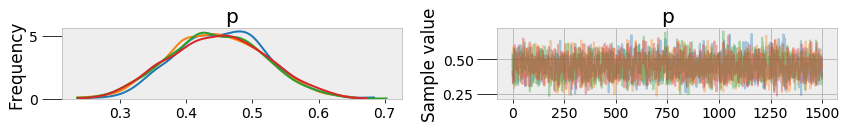

In [163]:
import pymc3 as pm
n = 45
heads = 20

niter = 2000
with pm.Model() as neg_model:
    p = pm.Beta('p', alpha=2, beta=2)
    y = pm.Binomial('y', n=n, p=p, observed=heads)
    print('starting sampling')
    traceneg = pm.sample(niter)

plt.figure(figsize=(7, 7))
traceplot(traceneg[500:])
plt.tight_layout();

In [169]:
pm.summary(traceneg)


,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
p,0.449719,0.070853,0.001108,0.31353,0.586727,3356.193824,1.00041


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p2]
Sampling 4 chains: 100%|██████████| 10000/10000 [00:03<00:00, 1350.04draws/s]
The acceptance probability does not match the target. It is 0.8794142141623312, but should be close to 0.8. Try to increase the number of tuning steps.
INFO (theano.gof.compilelock): Refreshing lock /home/szong/.theano/compiledir_Linux-3.10-el7.x86_64-x86_64-with-centos-7.4.1708-Core-x86_64-3.6.7-64/lock_dir/lock


<Figure size 504x504 with 0 Axes>

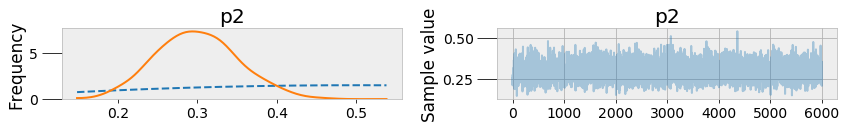

In [170]:
n = 73
heads = 21
niter = 2000
with pm.Model() as pos_model:
     # prior is distribution before seeing the data, we could incorporate expert knowledge etc.
    # beta distribution is very flexible, can take many different shapes, depending on alpha and beta values
    p2 = pm.Beta('p2', alpha=2, beta=2) # informtive prior
    y2 = pm.Binomial('y2', n=n, p=p2, observed=heads)
    tracepos2 = pm.sample(niter)

plt.figure(figsize=(7, 7))
traceplot(tracepos2[500:], 
          combined=True, 
          priors=[pm.Beta.dist(2,2)])
plt.tight_layout();

(6000,)

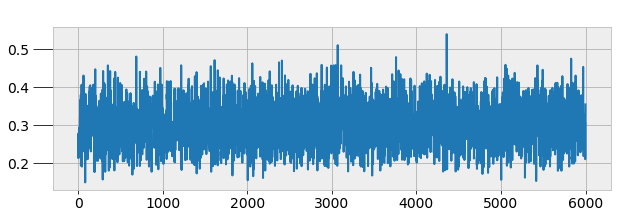

In [190]:
# trace plot is just the sample values from the prior distribution
# ths is identical to the traceplot hairy caterpillar
posps = tracepos2['p2', 500:]
posps.shape
# plt.hist(posps)
plt.plot(posps)
plt.show()

### access trace: sampled p 

(6000,)

(array([  45.,  222.,  691., 1237., 1420., 1318.,  704.,  282.,   71.,
          10.]),
 array([0.23430829, 0.28116812, 0.32802795, 0.37488778, 0.42174761,
        0.46860744, 0.51546727, 0.5623271 , 0.60918693, 0.65604676,
        0.70290658]),
 <a list of 10 Patch objects>)

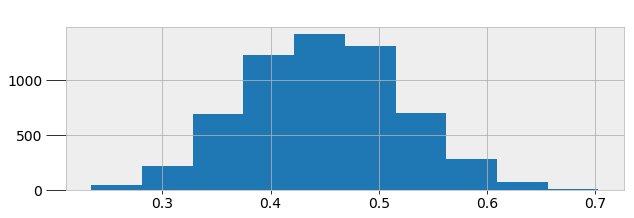

In [177]:
negps = traceneg['p', 500:] # burnin=500
negps.shape
plt.hist(negps)

(6000,)

(array([  52.,  389., 1161., 1704., 1550.,  776.,  299.,   60.,    7.,
           2.]),
 array([0.14825578, 0.18726302, 0.22627026, 0.2652775 , 0.30428475,
        0.34329199, 0.38229923, 0.42130647, 0.46031372, 0.49932096,
        0.5383282 ]),
 <a list of 10 Patch objects>)

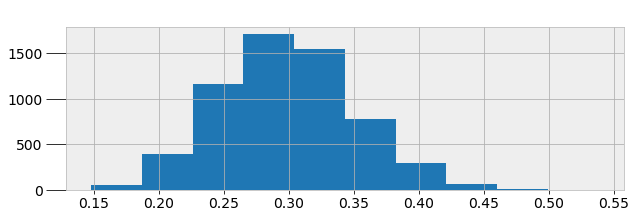

In [178]:
posps = tracepos2['p2', 500:]
posps.shape
plt.hist(posps)

In [185]:
posps

array([0.25042812, 0.21223365, 0.27634326, ..., 0.20917955, 0.26338485,
       0.35347689])

In [181]:
(negps > posps).mean()

0.9571666666666667

I think I need to sample in parallel and only keep the sampel when both pos and neg generate the right number of patients mutated. Above the sampling process is independent. 

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...


starting sampling


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p1]
Sampling 4 chains: 100%|██████████| 10000/10000 [00:03<00:00, 3107.46draws/s]
INFO (theano.gof.compilelock): Refreshing lock /home/szong/.theano/compiledir_Linux-3.10-el7.x86_64-x86_64-with-centos-7.4.1708-Core-x86_64-3.6.7-64/lock_dir/lock


tracepos1 is: <MultiTrace: 4 chains, 2000 iterations, 2 variables>


<Figure size 504x504 with 0 Axes>

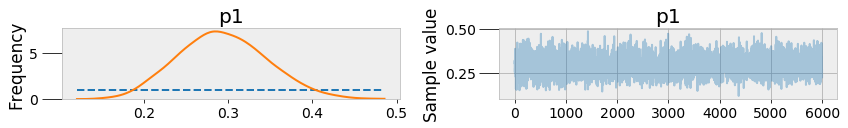

In [149]:
n = 73
heads = 21
niter = 2000

with pm.Model() as pos_model:
     # prior is distribution before seeing the data, we could incorporate expert knowledge etc.
    p1 = pm.Uniform('p1', lower=0, upper=1) # non-informative prior
    y1 = pm.Binomial('y1', n=n, p=p1, observed=heads)
    print('starting sampling')
    tracepos1 = pm.sample(niter)
    print(f'tracepos1 is: {tracepos1}')


plt.figure(figsize=(7, 7))
traceplot(tracepos1[500:], 
          combined=True, 
          priors=[pm.Uniform.dist(0,1)])


plt.tight_layout();

<Figure size 504x504 with 0 Axes>

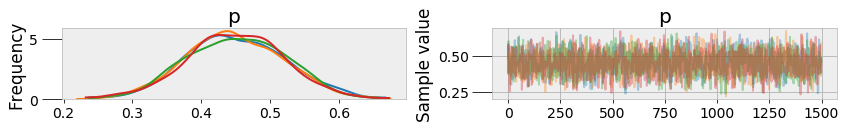

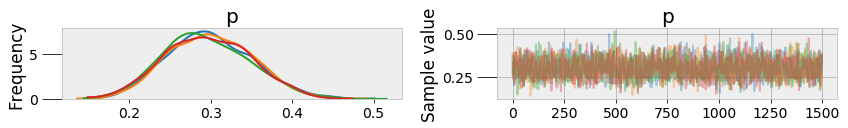

In [112]:
plt.figure(figsize=(7, 7))
# f, axes = plt.subplots(1,2, figsize=(14,7))
traceplot(traceneg[500:])
traceplot(tracepos[500:])
plt.tight_layout();

### plot prior and posteroir together

INFO (theano.gof.compilelock): Refreshing lock /home/szong/.theano/compiledir_Linux-3.10-el7.x86_64-x86_64-with-centos-7.4.1708-Core-x86_64-3.6.7-64/lock_dir/lock
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sd, mu]
Sampling 4 chains: 100%|██████████| 4000/4000 [00:01<00:00, 2376.90draws/s]


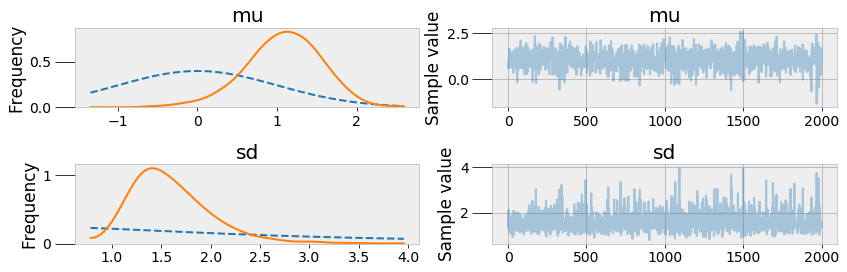

In [124]:
with pm.Model() as m: 
    mu = pm.Normal('mu', 0, 1)
    sd = pm.HalfCauchy('sd', 1.5)
    obs = pm.Normal('obs', mu, sd, observed=np.random.randn(10)*2.5+1)
    trace = pm.sample()

# this is allowed to plot prior
pm.traceplot(trace, 
             combined=True,
             priors=[pm.Normal.dist(0., 1), pm.HalfCauchy.dist(2.5)]);

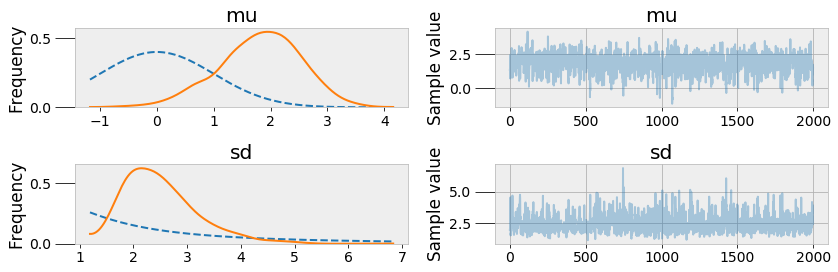

In [118]:
# this is also allow
pm.traceplot(trace, 
             combined=True, # combine mulit_chains or not
             priors=[mu.distribution, sd.distribution]);

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc9759dd9e8>,
      dtype=object)

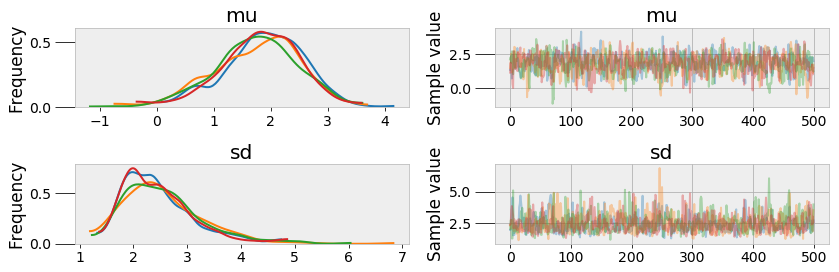

In [115]:
traceplot(trace[:])

### for some reason the generalized model does not work at the time being

In [62]:
with Model() as model:
    # specify glm and pass in data. The resulting linear model, its likelihood and
    # and all its parameters are automatically added to our model.
    glm.GLM.from_formula('y ~ x', data)
    trace = sample(3000, cores=2) # draw 3000 posterior samples using NUTS sampling

AssertionError: 